In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.cm as cm
%matplotlib inline  
from sklearn.decomposition import PCA


# image number to output
IMAGE_TO_DISPLAY = 20212

Accessing the data.

In [2]:
data = pd.read_csv('train.csv')
data_t = pd.read_csv('test.csv')

print('data({0[0]},{0[1]})'.format(data.shape))
print (data.head())

data(42000,785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0   

In [3]:
images = data.iloc[:,1:].values
images_t = data_t.iloc[:,:].values 
images = images.astype(np.float)
images_t = images_t.astype(np.float)
images = np.multiply(images, 1.0 / 255.0)
images_t = np.multiply(images_t, 1.0 / 255.0)
print('images({0[0]},{0[1]})'.format(images.shape))
print('images_t({0[0]},{0[1]})'.format(images_t.shape))


images(42000,784)
images_t(28000,784)


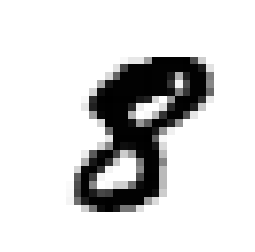

In [4]:
# display image
def display(img):
    
    # (784) => (28,28)
    one_image = img.reshape(28,28)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

# output image     
display(images[10])

In [5]:
X = images
y = data.iloc[:,0].values
print(y.shape[0])

42000


In [33]:
pca = PCA(n_components=0.99,svd_solver ='auto', whiten = False)
pca.fit(X)
X_ = pca.transform(X)
print(X_.shape, pca.noise_variance_)

((42000, 331), 0.0011561181138151431)


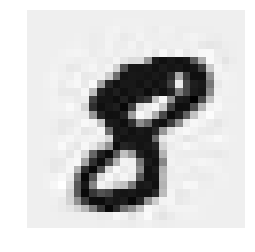

In [34]:


# output image
test = pca.inverse_transform(X_[10])
display(test)

In [39]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

# nn = MLPClassifier(hidden_layer_sizes = (25,25,), solver='sgd', activation = 'logistic',learning_rate_init=0.01,learning_rate='invscaling')
nn = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=200,  verbose=100, tol=1e-3, random_state=1)

parameter_grid = {'alpha': [0.1,0.3,1,3,10],
                  'activation': ['tanh','relu'],
                  'solver': ['adam'] ,
                  'learning_rate_init': [0.01]
                 }

cross_validation = StratifiedKFold(n_splits= 2 )


grid_search = GridSearchCV(nn,
                           param_grid=parameter_grid,
                           cv=cross_validation)


grid_search.fit(X_, y)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))



Iteration 1, loss = 0.53097495
Iteration 2, loss = 0.28322655
Iteration 3, loss = 0.24014520
Iteration 4, loss = 0.21619616
Iteration 5, loss = 0.19932294
Iteration 6, loss = 0.18956469
Iteration 7, loss = 0.18037583
Iteration 8, loss = 0.17374693
Iteration 9, loss = 0.17635411
Iteration 10, loss = 0.17028062
Iteration 11, loss = 0.16975902
Iteration 12, loss = 0.16481201
Iteration 13, loss = 0.16652783
Iteration 14, loss = 0.15821855
Iteration 15, loss = 0.15906673
Iteration 16, loss = 0.15833132
Iteration 17, loss = 0.15731730
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.52114930
Iteration 2, loss = 0.27723775
Iteration 3, loss = 0.23783267
Iteration 4, loss = 0.21381275
Iteration 5, loss = 0.19601636
Iteration 6, loss = 0.18637006
Iteration 7, loss = 0.17518452
Iteration 8, loss = 0.25288974
Iteration 9, loss = 0.17759994
Iteration 10, loss = 0.17552935
Training loss did not improve more than tol=0.001000 for two co

Iteration 1, loss = 1.03256270
Iteration 2, loss = 0.72842671
Iteration 3, loss = 0.71605976
Iteration 4, loss = 0.70583896
Iteration 5, loss = 0.70089054
Iteration 6, loss = 0.69710461
Iteration 7, loss = 0.69119378
Iteration 8, loss = 0.69049989
Iteration 9, loss = 0.68959520
Iteration 10, loss = 0.68762239
Iteration 11, loss = 0.68809120
Iteration 12, loss = 0.68734886
Iteration 13, loss = 0.68266751
Iteration 14, loss = 0.68319462
Iteration 15, loss = 0.68489453
Iteration 16, loss = 0.67910637
Iteration 17, loss = 0.67922110
Iteration 18, loss = 0.68123298
Iteration 19, loss = 0.68119380
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.03738860
Iteration 2, loss = 0.78657867
Iteration 3, loss = 0.77423863
Iteration 4, loss = 0.77112283
Iteration 5, loss = 0.76098319
Iteration 6, loss = 0.75647871
Iteration 7, loss = 0.75089931
Iteration 8, loss = 0.79703258
Iteration 9, loss = 0.74521545
Iteration 10, loss = 0.74290892

In [ ]:
# nn.fit(X_[0:30000],y[0:30000])

# train_predict = nn.predict(X_)

# print(train_predict)

# test_predict = nn.predict(pca.transform(images_t))
# print(test_predict[10])

# print(nn.score(X_[0:30000],y[0:30000]))
# print(nn.score(X_[30001:41999],y[30001:41999]))

In [43]:
classifier = grid_search.best_estimator_
train_predict = classifier.predict(pca.transform(images_t))
train_predict

array([2, 0, 9, ..., 3, 9, 2])

In [66]:
# output=[]
# for i in range(1,test_predict.shape[0]+1):
#     output.append([(i),(test_predict[i-1])])
    
# # print(output)

# # np.insert(output,[0,0],["ImageId", "Label"])
# print(output)

# # output.to_csv("trial1.csv")delimiter=
# np.savetxt("trial1.csv",output,delimiter=',', fmt='%d', header='ImageId,Label')

df = pd.DataFrame({
    'ImageId': pd.Series(range(1,len(train_predict)+1),index=list(range(len(train_predict))),dtype='int32'),
    'Label' : pd.Series(train_predict)
})
df

df.to_csv("trialNN.csv",index=False)

In [ ]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max()
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()